In [5]:
#Importing the required libraries

import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

import matplotlib.pyplot as plt

In [6]:
#Load the CIFAR-10 data

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 155s 1us/step


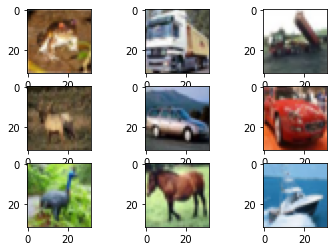

In [7]:
#Display few images from the dataset

for i in range(0, 9):
    plt.subplot(3,3,i + 1)
    plt.imshow((X_train[i]))
# show the plot
plt.show()

In [8]:
#Convert the input into floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalize the data such that the values are betwenn 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
#one hot encode the outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [10]:
#Assingning values to hyperparameters

lr_rate = 0.01
batch_size = 35
epochs = 20
n_classes = 10

In [11]:
#create the model
model = Sequential()

#Layer 1
model.add(Convolution2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Layer 2
model.add(Convolution2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Layer 3
model.add(Convolution2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())  #Flattens the previous layer into a huge vector

#Fully connected layer
model.add(Dense(512, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dropout(0.30))
model.add(Dense(10, activation = 'softmax'))

In [12]:
#compile the CNN
#from keras.optimizers import SGD
#sgd = SGD(lr = lr_rate)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
#Fit the CNN model to our dataset
output = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_test, y_test))

Epoch 1/20
1429/1429 [==============================] - 83s 55ms/step - loss: 1.6143 - accuracy: 0.4050 - val_loss: 1.3111 - val_accuracy: 0.5351
Epoch 2/20
1429/1429 [==============================] - 73s 51ms/step - loss: 1.2795 - accuracy: 0.5399 - val_loss: 1.0963 - val_accuracy: 0.6049
Epoch 3/20
1429/1429 [==============================] - 78s 54ms/step - loss: 1.1521 - accuracy: 0.5902 - val_loss: 1.0256 - val_accuracy: 0.6318
Epoch 4/20
1429/1429 [==============================] - 71s 50ms/step - loss: 1.0714 - accuracy: 0.6199 - val_loss: 0.9447 - val_accuracy: 0.6685
Epoch 5/20
1429/1429 [==============================] - 71s 49ms/step - loss: 1.0134 - accuracy: 0.6437 - val_loss: 0.9189 - val_accuracy: 0.6815
Epoch 6/20
1429/1429 [==============================] - 68s 47ms/step - loss: 0.9681 - accuracy: 0.6608 - val_loss: 0.9097 - val_accuracy: 0.6832
Epoch 7/20
1429/1429 [==============================] - 65s 45ms/step - loss: 0.9377 - accuracy: 0.6712 - val_loss: 0.8387 -

In [14]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 7s 23ms/step - loss: 0.7465 - accuracy: 0.7441
[0.7464656829833984, 0.7440999746322632]


Text(0.5, 1.0, 'Accuracy Curves')

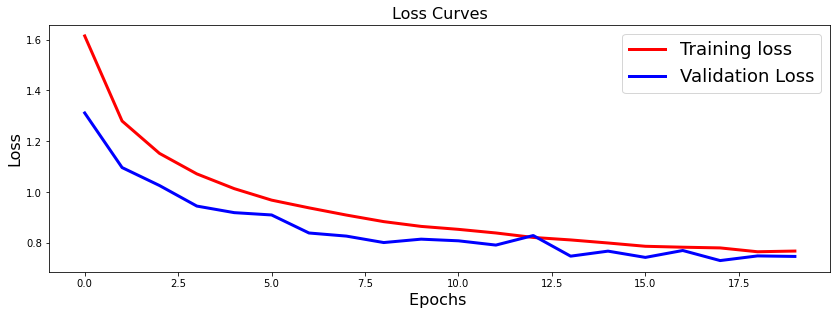

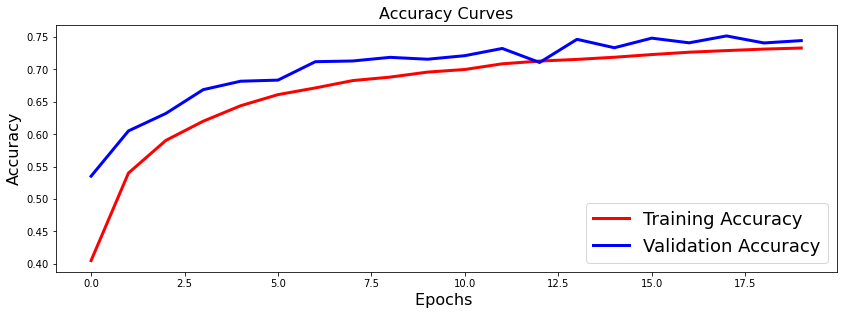

In [17]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(output.history['loss'],'r',linewidth=3.0)
plt.plot(output.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(output.history['accuracy'],'r',linewidth=3.0)
plt.plot(output.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [23]:
conda install nbconvert


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: F:\New

